In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math

## Read in Data
life = pd.read_csv("all_data.csv")
print(life.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


In [60]:
#Find out how many countries are on data set
country_counts = life['Country'].value_counts()
print(country_counts)

Country
Chile                       16
China                       16
Germany                     16
Mexico                      16
United States of America    16
Zimbabwe                    16
Name: count, dtype: int64


In [61]:
print("Years included: {}".format(life.Year.unique()))

Years included: [2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


In [62]:
#group each country individually

country_data = {}

for country, group in life.groupby('Country'):
    country_data[country] = group

print(country_data)

{'Chile':    Country  Year  Life expectancy at birth (years)           GDP
0    Chile  2000                              77.3  7.786093e+10
1    Chile  2001                              77.3  7.097992e+10
2    Chile  2002                              77.8  6.973681e+10
3    Chile  2003                              77.9  7.564346e+10
4    Chile  2004                              78.0  9.921039e+10
5    Chile  2005                              78.4  1.229650e+11
6    Chile  2006                              78.9  1.547880e+11
7    Chile  2007                              78.9  1.736060e+11
8    Chile  2008                              79.6  1.796380e+11
9    Chile  2009                              79.3  1.723890e+11
10   Chile  2010                              79.1  2.185380e+11
11   Chile  2011                              79.8  2.522520e+11
12   Chile  2012                              79.9  2.671220e+11
13   Chile  2013                              80.1  2.783840e+11
14   Chile  201

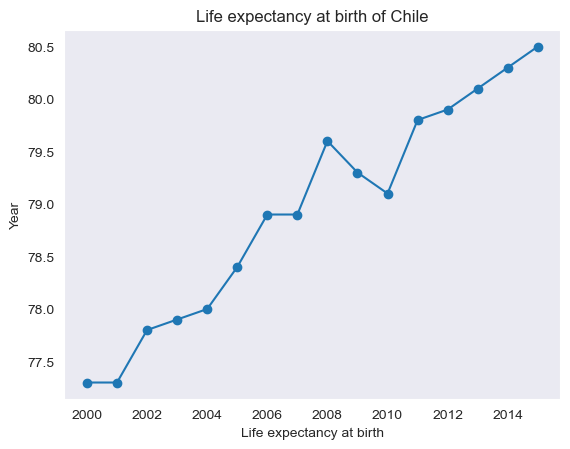

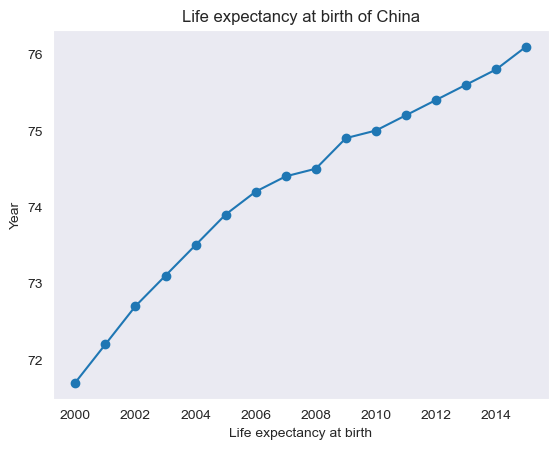

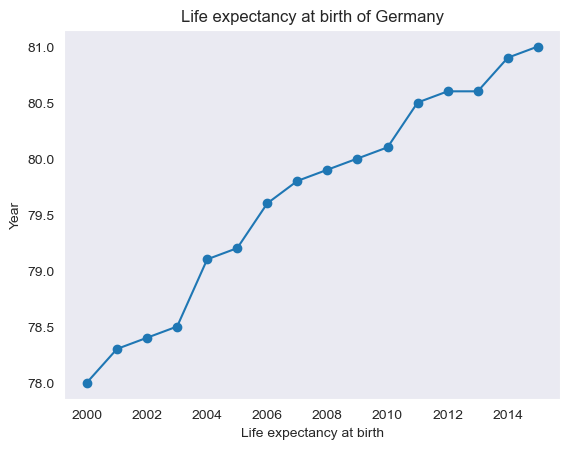

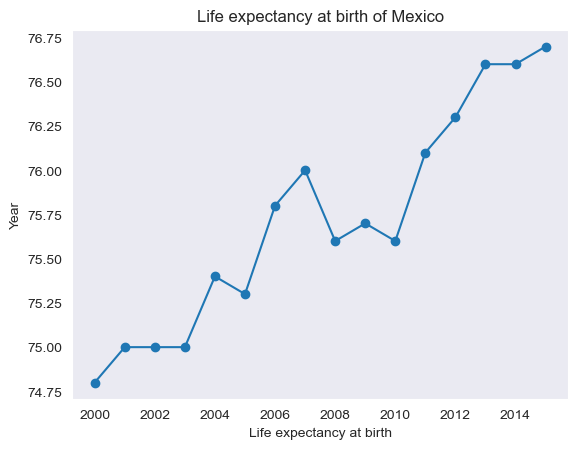

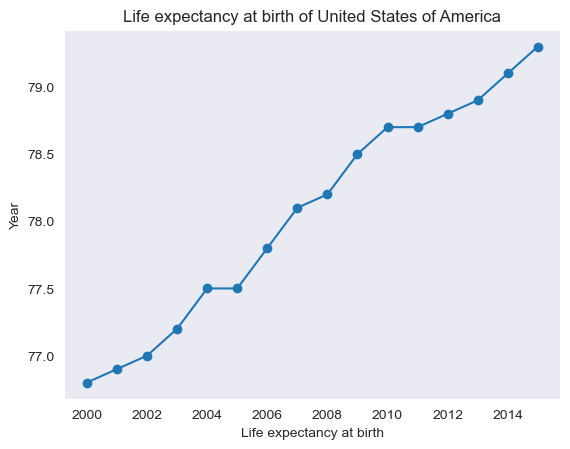

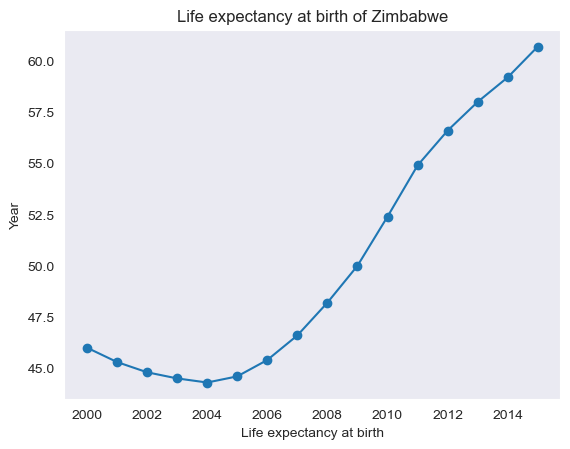

<Figure size 640x480 with 0 Axes>

In [63]:
# Use for loop to plotting a line graph for Life expectancy at birth of each country

for i in country_data:
    x_values = country_data[i]['Year']
    y_values = country_data[i]['Life expectancy at birth (years)']
    plt.plot(x_values, y_values, marker='o')
    plt.title(str("Life expectancy at birth of " + str(i)))
    plt.xlabel('Life expectancy at birth')
    plt.ylabel('Year')
    plt.show()
    plt.clf()


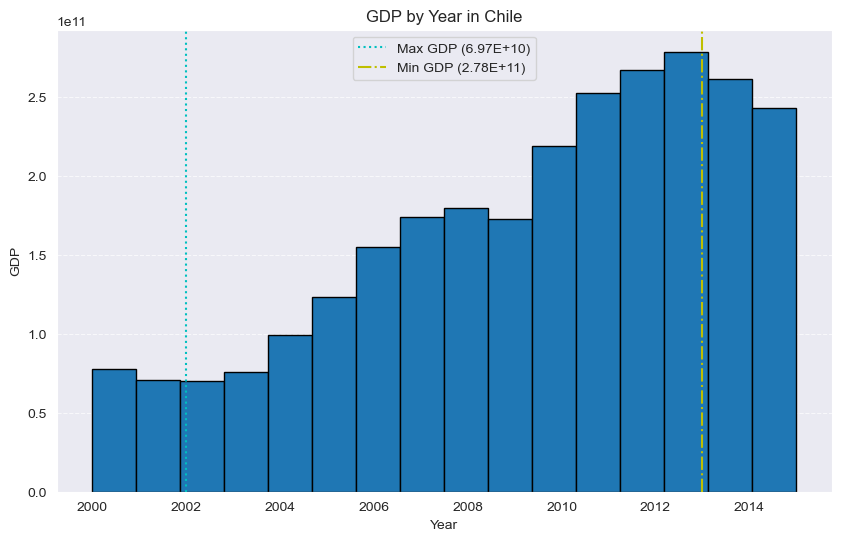

<Figure size 640x480 with 0 Axes>

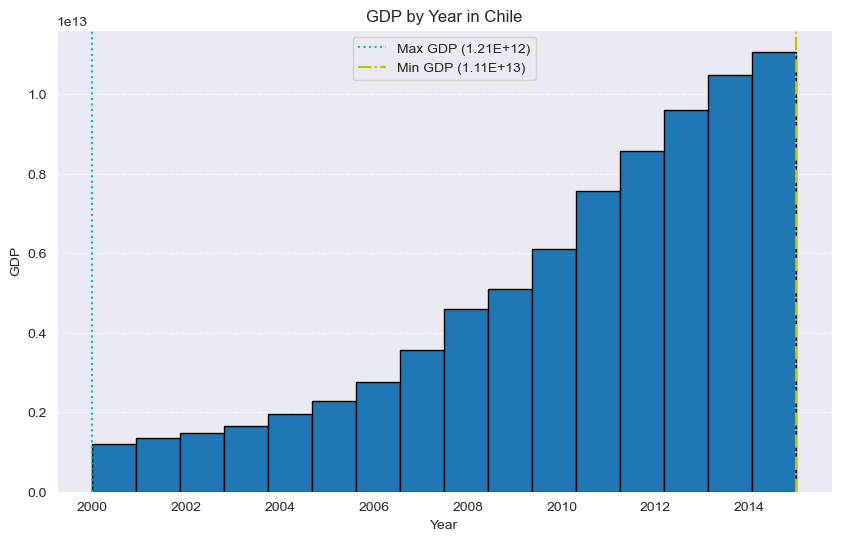

<Figure size 640x480 with 0 Axes>

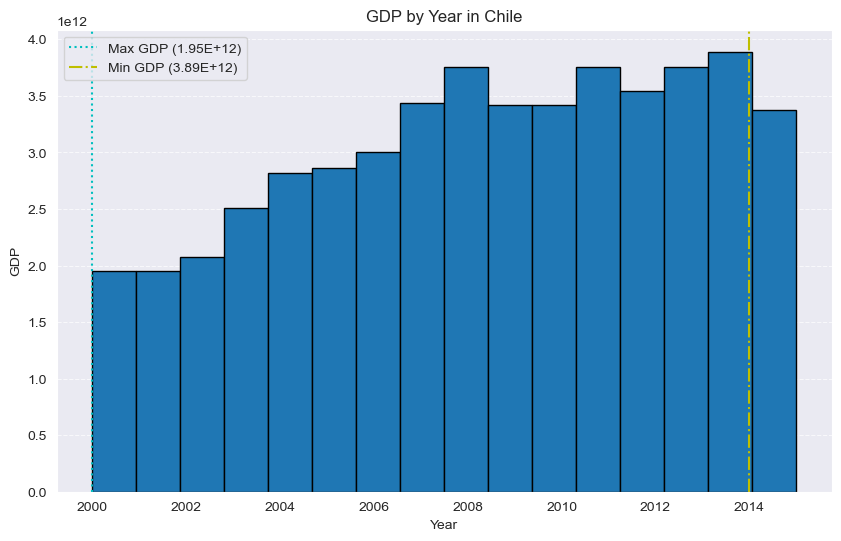

<Figure size 640x480 with 0 Axes>

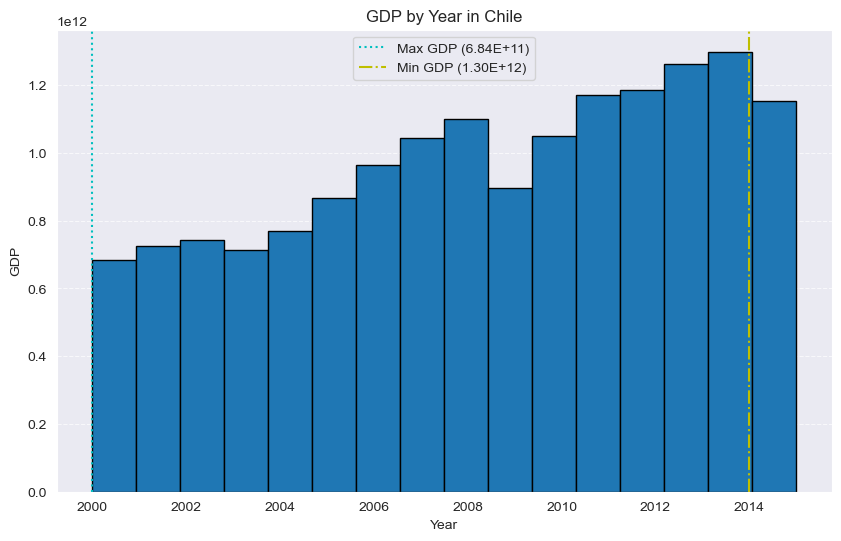

<Figure size 640x480 with 0 Axes>

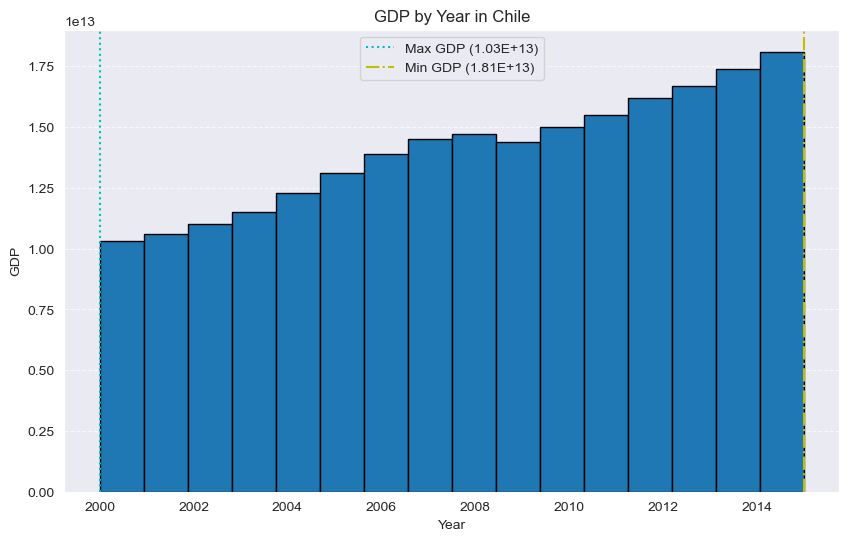

<Figure size 640x480 with 0 Axes>

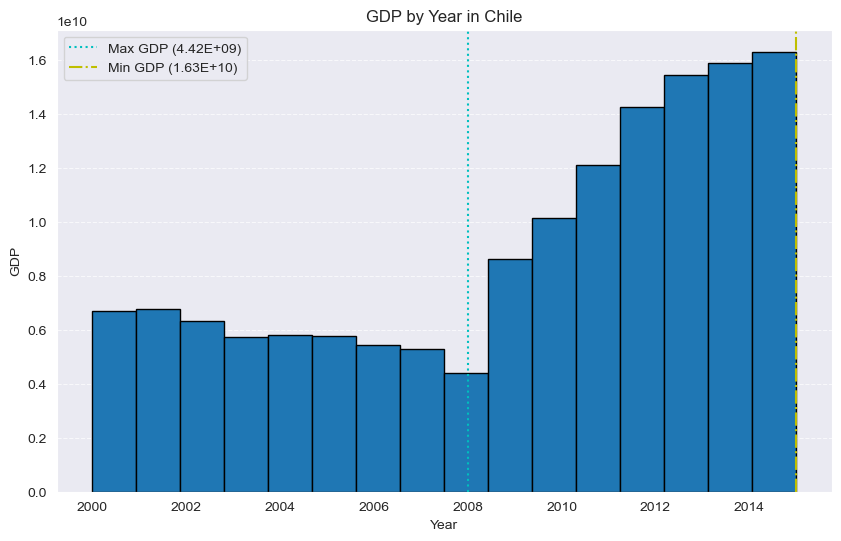

<Figure size 640x480 with 0 Axes>

In [64]:
# Plot histogram showing GDP by year for each country

for c in country_data:
    
#Create a list individually
    country = life[life['Country'] == c]
    

    #plotting histogram
    plt.figure(figsize=(10, 6))
    plt.hist(country['Year'], bins=16, weights=country['GDP'], edgecolor='k')
    plt.title('GDP by Year in Chile')
    plt.xlabel('Year')
    plt.ylabel('GDP')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    #Calculate & draw a line for MIN, MAX of GDP
    min_gdp = country['GDP'].max()
    max_gdp = country['GDP'].min()
    plt.axvline(x = country[country['GDP'] == max_gdp]['Year'].values[0], color = 'c', linestyle = ':', label=f'Max GDP ({max_gdp:.2E})')
    plt.axvline(x = country[country['GDP'] == min_gdp]['Year'].values[0], color = 'y', linestyle = '-.', label=f'Min GDP ({min_gdp:.2E})')


    plt.legend()
    plt.show()
    plt.clf()

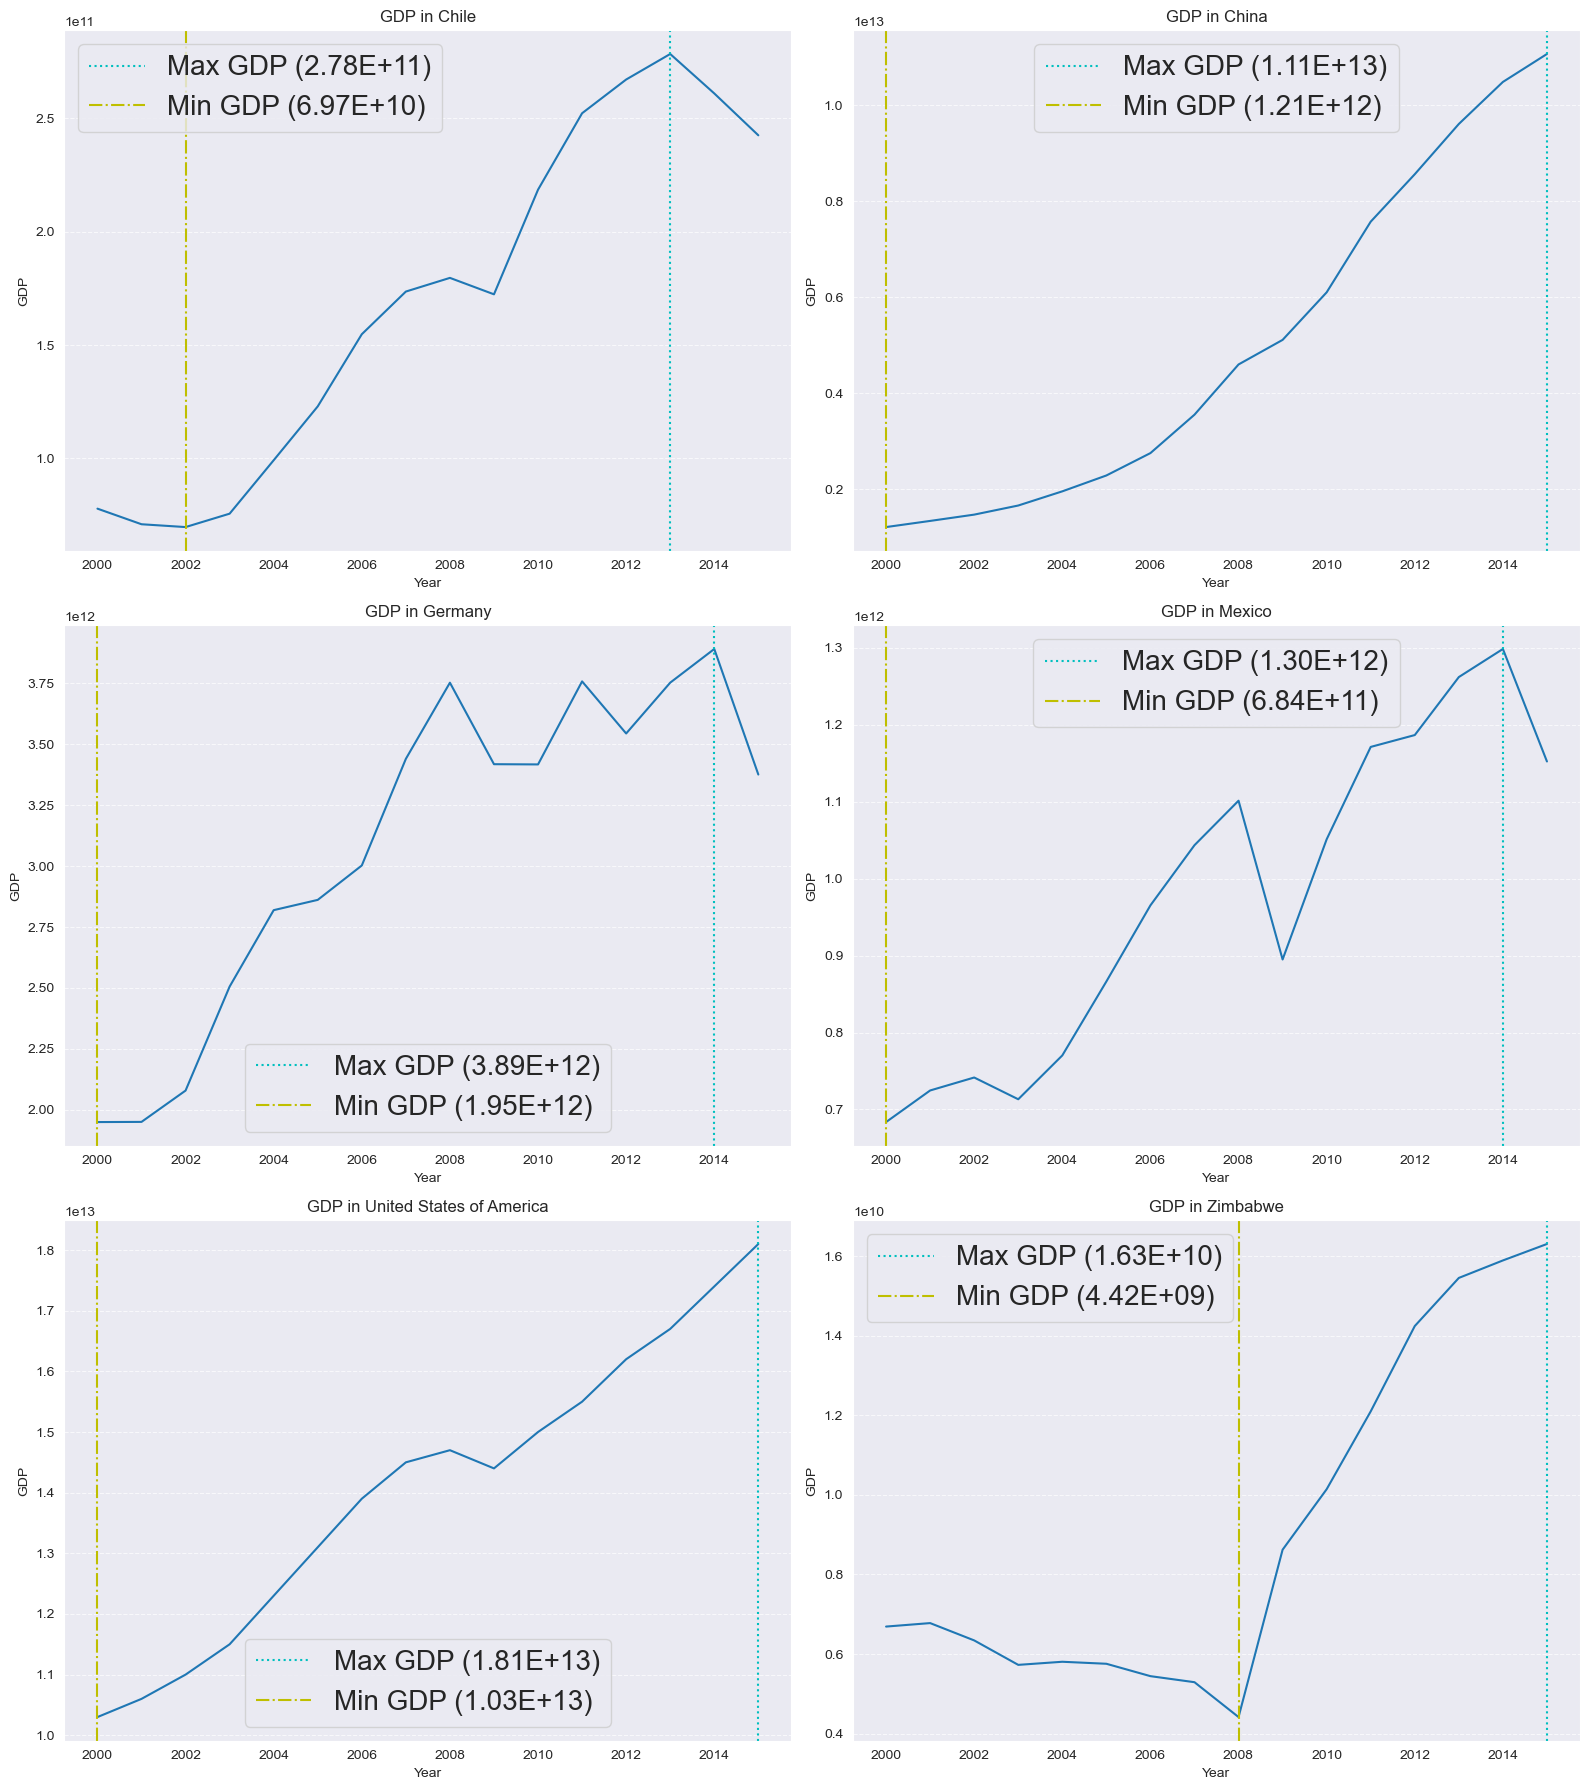

In [65]:
# Assuming `life` is the DataFrame containing country data
countries = life['Country'].unique()  # Get unique country names
num_countries = len(countries)
rows = 3
cols = 2  # Fixed to display 2 countries per row

# Create the figure and subplots
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(cols * 8, rows * 6))

# Iterate through countries in pairs
for i in range(0, num_countries, 2):
    c1, c2 = countries[i:i+2]  # Get two countries at a time

    # Filter data for each country
    country1 = life[life['Country'] == c1]
    country2 = life[life['Country'] == c2]

    # Plot the first country's GDP over time with min/max lines, title, and legend
    ax1 = axes[i // cols, i % cols]
    ax1.plot(country1['Year'], country1['GDP'])
    ax1.set_title(f'GDP in {c1}')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('GDP')

    max_gdp_year = country1['Year'][country1['GDP'].idxmax()]
    min_gdp_year = country1['Year'][country1['GDP'].idxmin()]
    ax1.axvline(x=max_gdp_year, color='c', linestyle=':', label=f'Max GDP ({country1["GDP"].max():.2E})')
    ax1.axvline(x=min_gdp_year, color='y', linestyle='-.', label=f'Min GDP ({country1["GDP"].min():.2E})')
    ax1.legend(fontsize=20)
    ax1.grid(axis='y', linestyle='--', alpha=0.7)

    # Plot the second country's GDP over time with min/max lines, title, and legend
    ax2 = axes[i // cols, (i + 1) % cols]
    ax2.plot(country2['Year'], country2['GDP'])
    ax2.set_title(f'GDP in {c2}')  # Added title for the second plot
    ax2.set_xlabel('Year')
    ax2.set_ylabel('GDP')

    max_gdp_year = country2['Year'][country2['GDP'].idxmax()]
    min_gdp_year = country2['Year'][country2['GDP'].idxmin()]
    ax2.axvline(x=max_gdp_year, color='c', linestyle=':', label=f'Max GDP ({country2["GDP"].max():.2E})')
    ax2.axvline(x=min_gdp_year, color='y', linestyle='-.', label=f'Min GDP ({country2["GDP"].min():.2E})')
    ax2.legend(fontsize=20)  # Added legend for the second plot
    ax2.grid(axis='y', linestyle='--', alpha=0.7)
    

# Adjust spacing and display the figure
plt.tight_layout()
plt.show()


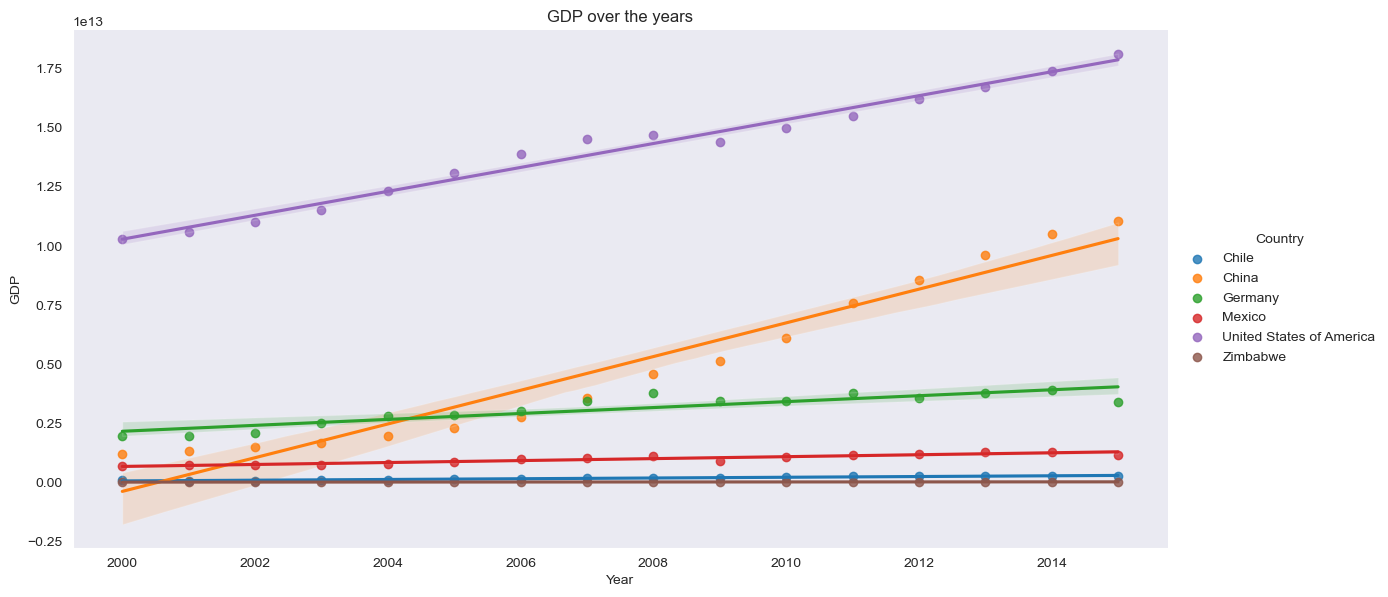

In [66]:
#calculating GDP of each counry over the years
sns.lmplot(x = 'Year', y = 'GDP', hue = 'Country' , data = life, height=6, aspect=2)
plt.title('GDP over the years')
plt.show()
plt.close()

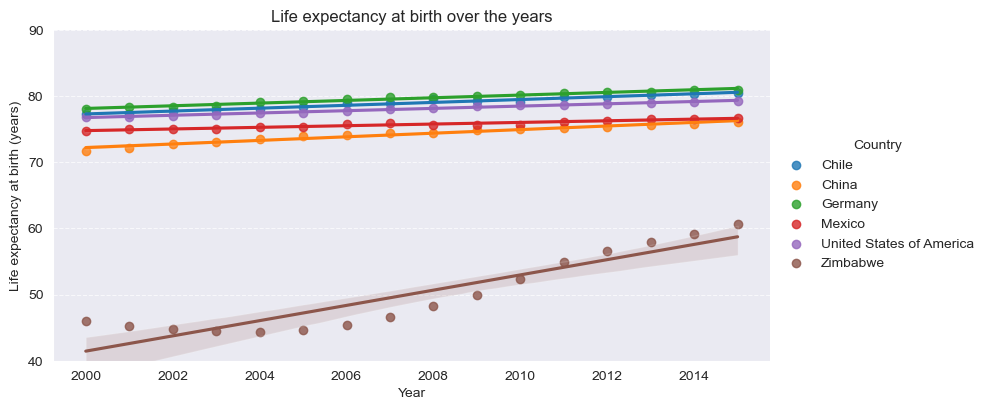

In [67]:
#calculating Life expectancy at birth of each counry over the years
sns.lmplot(x = 'Year', y = 'Life expectancy at birth (years)', hue = 'Country' , data = life, height=4, aspect=2)
plt.ylim(40, 90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Life expectancy at birth over the years')
plt.show()
plt.close()

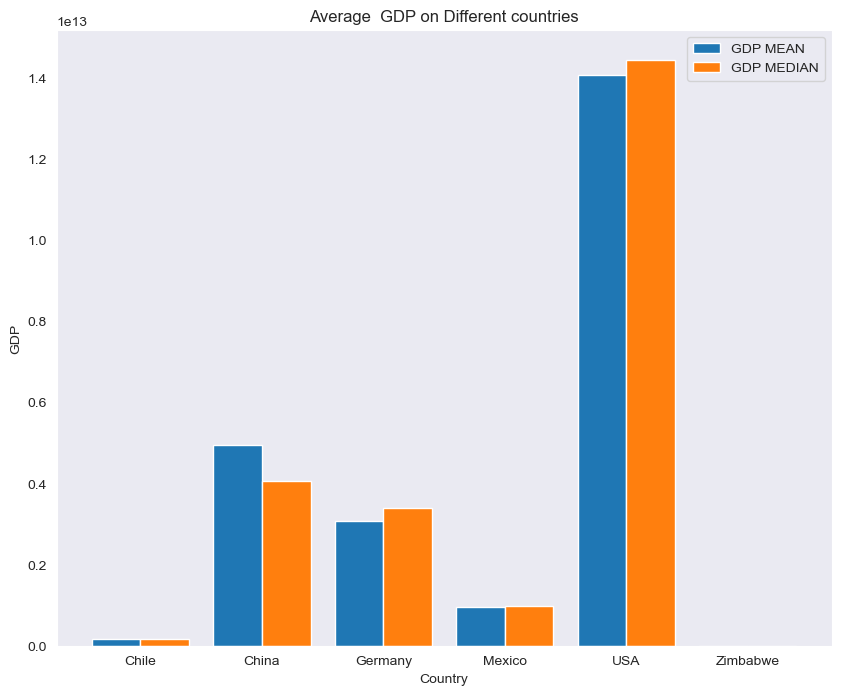

In [68]:
countries_mean = []
countries_median = []
countries_min = []
countries_max = []


countries_life_min = []
countries_life_max = []

for c in country_data:
    
#Create a list individually
    country = life[life['Country'] == c] 

    #calculate each countries mean and add it to countries_mean 
    country_mean = country['GDP'].mean()
    #add mean to countries_mean list
    countries_mean.append(country_mean)

    #calculate each countries median and add it to countries_median 
    country_median = country['GDP'].median()
    #add median to countries_median list
    countries_median.append(country_median)

    #calculate each countries min and add it to countries_min 
    country_min = country['GDP'].min()
    #add min to countries_min list
    countries_min.append(country_min)
    
    #calculate each countries max and add it to countries_max 
    country_max = country['GDP'].max()
    #add max to countries_max list
    countries_max.append(country_max)
    
    
    
    #calculate each countries min life and add it to countries_life_min 
    country_min_life = country['Life expectancy at birth (years)'].min()
    #add min lief to countries_life_min list
    countries_life_min.append(country_min_life)
    
    #calculate each countries max life and add it to countries_life_max 
    country_max_life = country['Life expectancy at birth (years)'].max()
    #add max to countries_life_max life list
    countries_life_max.append(country_max_life)
    
    
    
#side by side bar plot function
def create_x(t, w, n, d):
    return [t*x + w*n for x in range(d)]

plt.figure(figsize=(10, 8))
ax = plt.subplot()


#create mean and median bar for each country
mean_bars = create_x(2, 0.8, 1, 6)
plt.bar(mean_bars, countries_mean)
median_bars = create_x(2, 0.8, 2, 6)
plt.bar(median_bars, countries_median)

#Set x axis label to be name of each country
middle_x = [ (a + b) / 2.0 for a, b in zip(mean_bars, median_bars)]
ax.set_xticks(middle_x)
life_countires = ['Chile', 'China', 'Germany', 'Mexico', 'USA', 'Zimbabwe']
ax.set_xticklabels(life_countires)


plt.legend(['GDP MEAN', 'GDP MEDIAN'])
plt.title('Average  GDP on Different countries')
plt.xlabel('Country')
plt.ylabel('GDP')


plt.show()
plt.close()

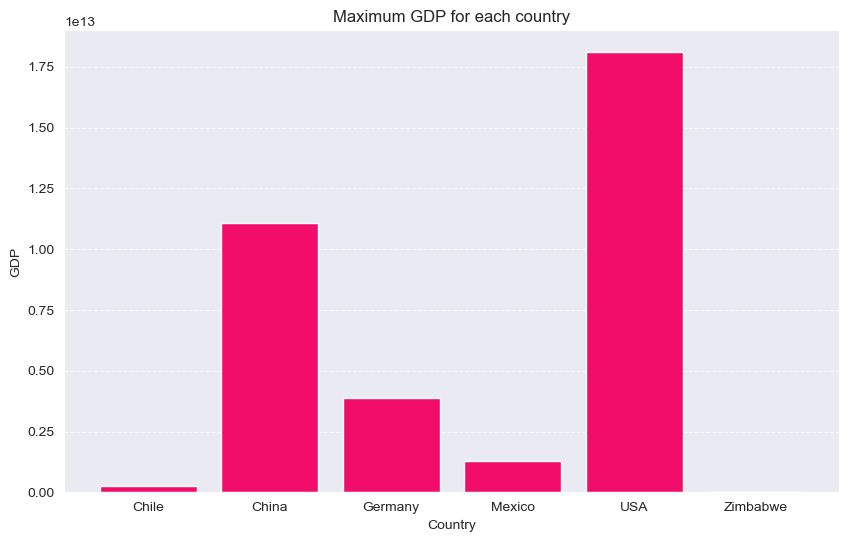

In [69]:
# Create a bar chart for GDP Max for each country
plt.figure(figsize=(10, 6))

plt.bar(life_countires, countries_max, color='#f20d6a')

plt.title('Maximum GDP for each country')
plt.xlabel('Country')
plt.ylabel('GDP')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()
plt.close()

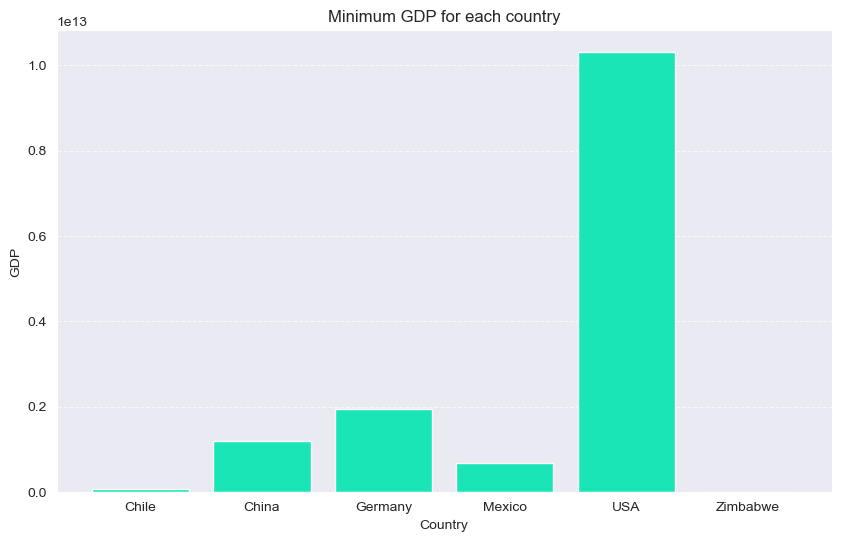

In [70]:
# Create a bar chart for GDP MIN for each country
plt.figure(figsize=(10, 6))

plt.bar(life_countires, countries_min, color='#1ae5b6')

plt.title('Minimum GDP for each country')
plt.xlabel('Country')
plt.ylabel('GDP')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()
plt.close()

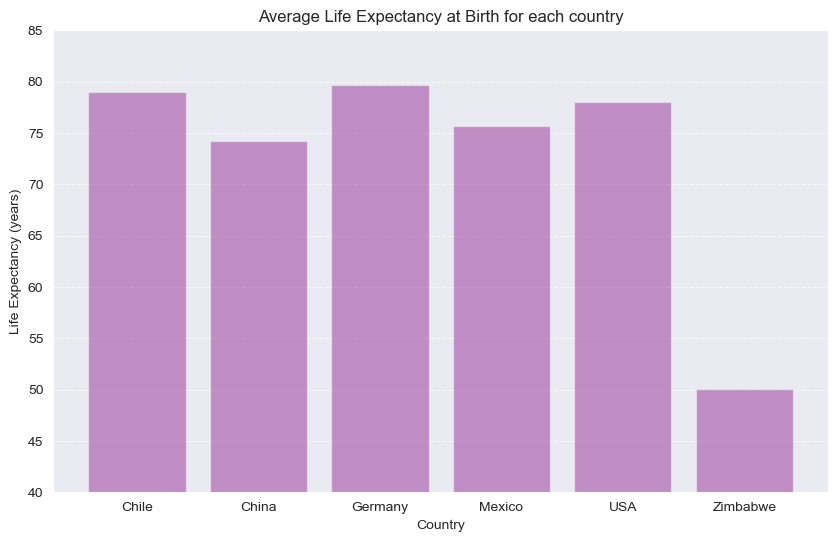

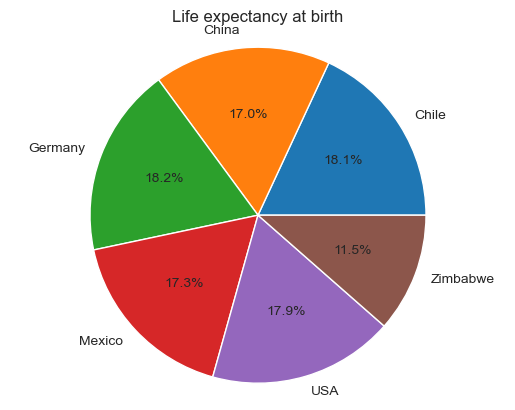

In [71]:
#calculating life expectancy at birth (leab) mean 
leab_mean = []
leab_min = []
leab_max = []

for l in country_data:
    
#Create a list individually
    country = life[life['Country'] == l] 

    #calculate each countries mean and add it to leab_mean
    expectancy_mean = country['Life expectancy at birth (years)'].mean()
    #add mean to leab_mean list
    leab_mean.append(expectancy_mean)
    
    #calculate each countries min and add it to leab_min
    expectancy_min = country['Life expectancy at birth (years)'].min()
    #add min to leab_min list
    leab_min.append(expectancy_min)
    
    #calculate each countries max and add it to leab_max
    expectancy_max = country['Life expectancy at birth (years)'].max()
    #add max to leab_max list
    leab_max.append(expectancy_max)

# Create a bar chart for life expectancy  Mean for each country
plt.figure(figsize=(10, 6))
plt.bar(life_countires, leab_mean, color='purple', alpha=0.4)


plt.title('Average Life Expectancy at Birth for each country')
plt.xlabel('Country')
plt.ylabel('Life Expectancy (years)')
plt.ylim(40, 85)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
plt.close()

    
#plot a pie chart for life expectancy mean 
plt.pie(leab_mean, labels=life_countires, autopct='%0.1f%%')
plt.axis('equal') 

plt.title('Life expectancy at birth')
plt.show()
plt.close()

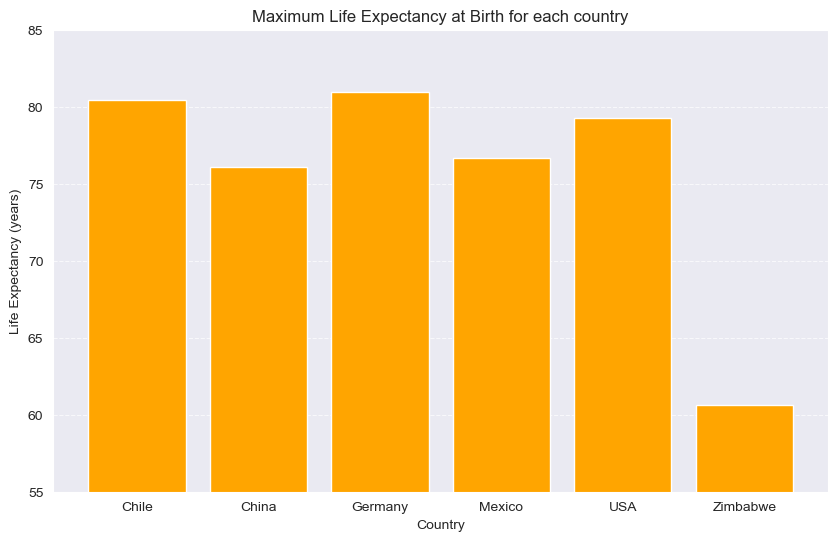

In [72]:
# Create a bar chart for life expectancy  Max for each country
plt.figure(figsize=(10, 6))

plt.bar(life_countires, leab_max, color='orange')

plt.title('Maximum Life Expectancy at Birth for each country')
plt.xlabel('Country')
plt.ylabel('Life Expectancy (years)')
plt.ylim(55, 85)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()
plt.close()

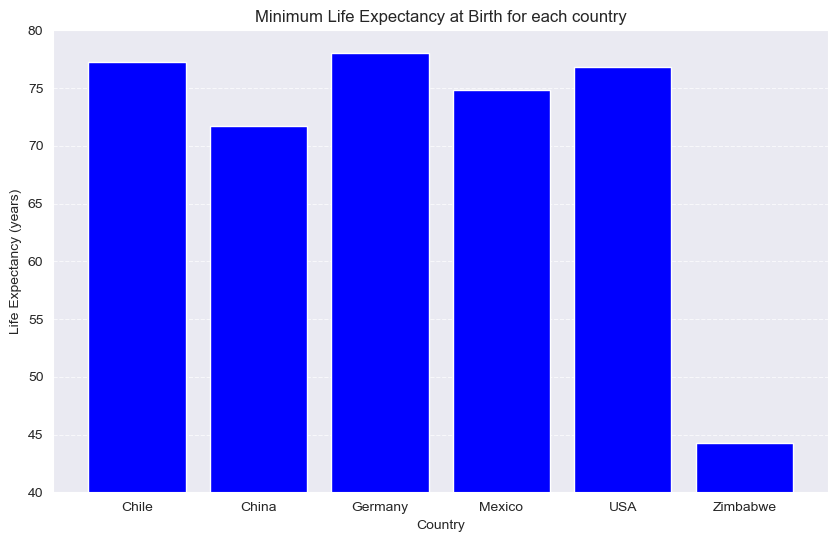

In [73]:
# Create a bar chart for life expectancy  Min for each country
plt.figure(figsize=(10, 6))

plt.bar(life_countires, leab_min, color='blue')

plt.title('Minimum Life Expectancy at Birth for each country')
plt.xlabel('Country')
plt.ylabel('Life Expectancy (years)')
plt.ylim(40, 80)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()
plt.close()

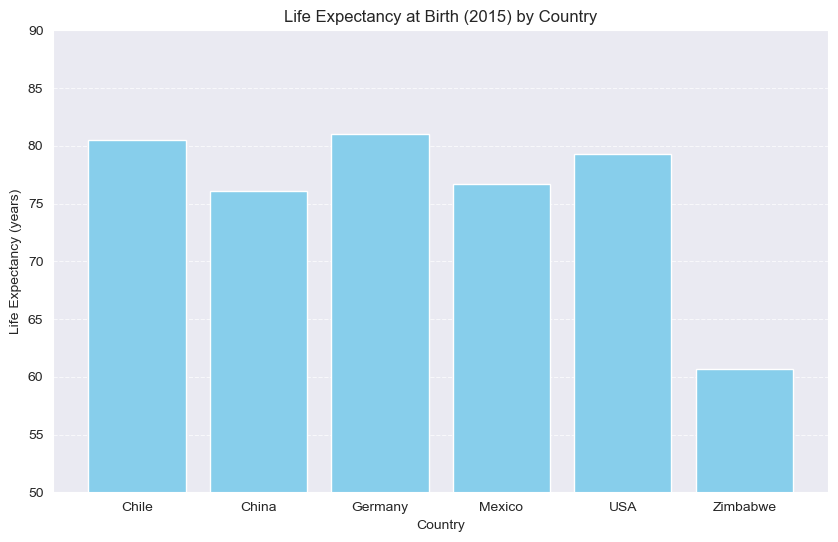

In [74]:
#life expectancy of 2015 list
leab_2015 = life[life['Year'] == 2015]['Life expectancy at birth (years)']

# Create a bar chart for 2015 life expectancy
plt.figure(figsize=(10, 6))
plt.bar(life_countires, leab_2015, color='skyblue')

plt.title('Life Expectancy at Birth (2015) by Country')
plt.xlabel('Country')
plt.ylabel('Life Expectancy (years)')
plt.ylim(50, 90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()
plt.close()

P:\programmmmmmmmm\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
P:\programmmmmmmmm\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


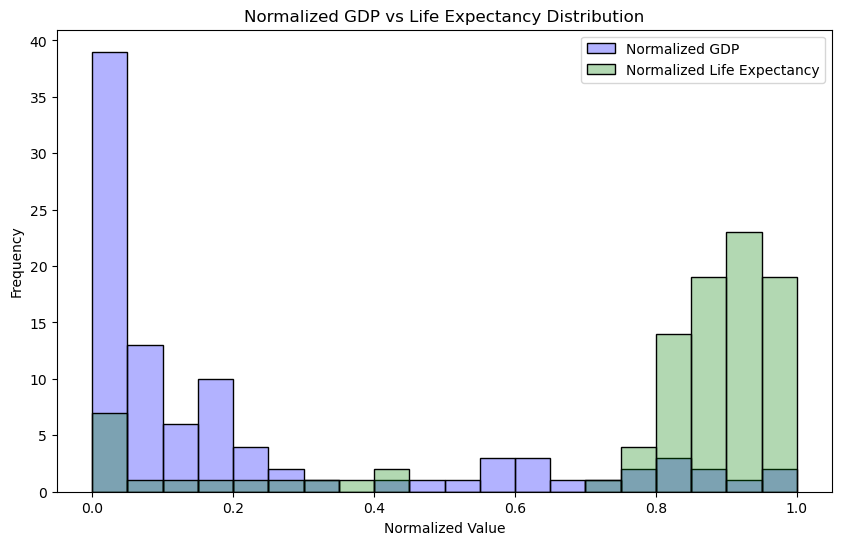

In [15]:
#normalize GDP and life expectancy
normalized_gdp = (life['GDP'] - life['GDP'].min()) / (life['GDP'].max() - life['GDP'].min())
normalized_life_expectancy = (life['Life expectancy at birth (years)'] - life['Life expectancy at birth (years)'].min()) / (life['Life expectancy at birth (years)'].max() - life['Life expectancy at birth (years)'].min())

# Plotting Normalized GDP vs Life Expectancy Distribution
plt.figure(figsize=(10, 6))
sns.histplot(normalized_gdp, bins=20, color='blue', alpha = 0.3, label='Normalized GDP')
sns.histplot(normalized_life_expectancy, bins=20, color='green', alpha = 0.3, label='Normalized Life Expectancy')

plt.title('Normalized GDP vs Life Expectancy Distribution')
plt.xlabel('Normalized Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

P:\programmmmmmmmm\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


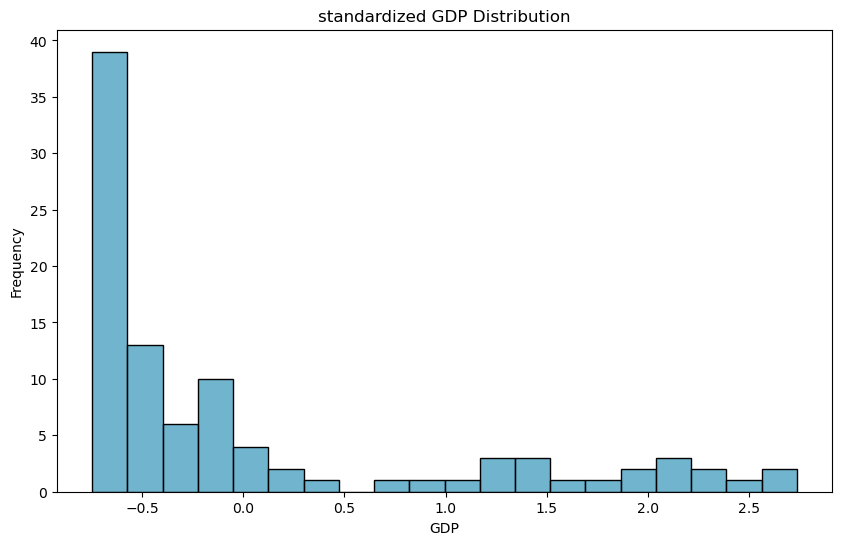

P:\programmmmmmmmm\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


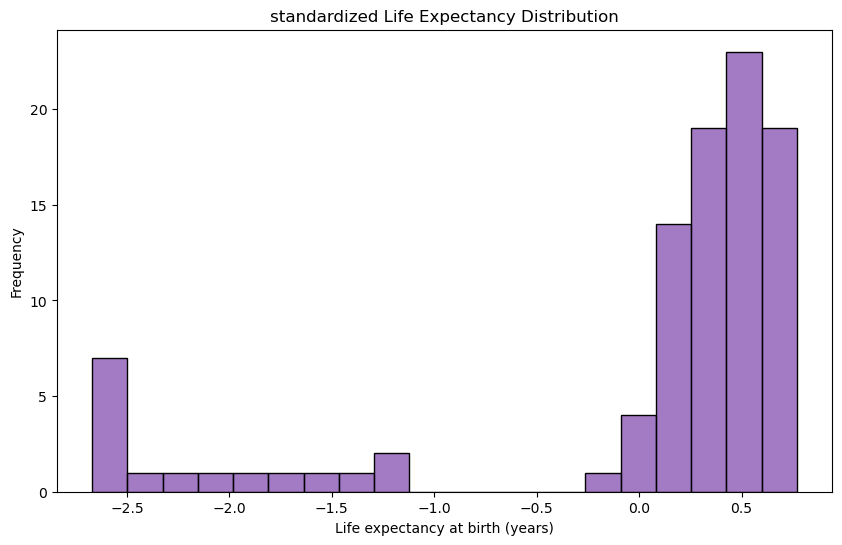

In [16]:
# Standardization : x - x_mean / x_std
standardized_gdp = (life['GDP'] - life['GDP'].mean()) / (life['GDP'].std())
standardized_life_expectancy = (life['Life expectancy at birth (years)'] - life['Life expectancy at birth (years)'].mean()) / (life['Life expectancy at birth (years)'].std())

# Plotting standardized GDP
plt.figure(figsize=(10, 6))
sns.histplot(standardized_gdp,bins=20, color='#419bbe')
plt.title('standardized GDP Distribution')
plt.ylabel('Frequency')
plt.show()
plt.close()


# Plotting standardized Life Expectancy
plt.figure(figsize=(10, 6))
sns.histplot(standardized_life_expectancy,bins=20 , color='#844eb1')
plt.title('standardized Life Expectancy Distribution')
plt.ylabel('Frequency')
plt.show()
plt.close()

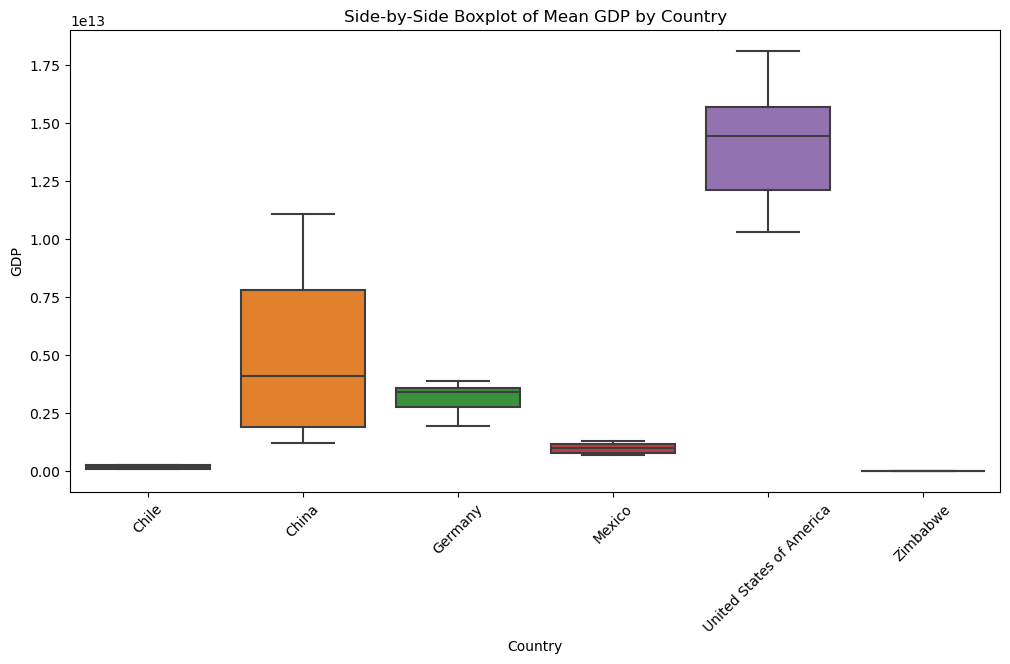

In [17]:
# Plotting a Side-by-Side Boxplot of Mean GDP by Country
plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y='GDP', data=life)
plt.title('Side-by-Side Boxplot of Mean GDP by Country')
plt.xticks(rotation=45)
plt.show()
plt.close()

P:\programmmmmmmmm\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


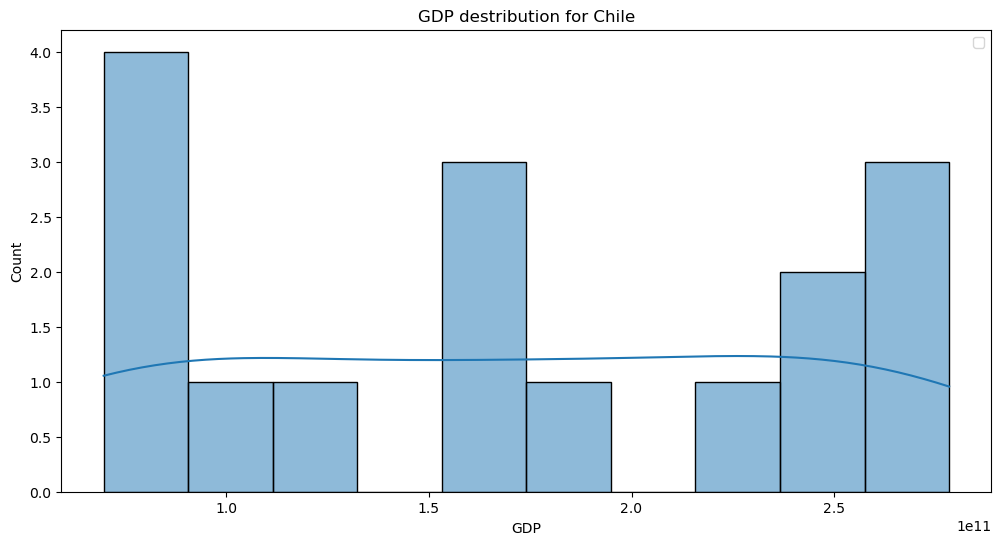

P:\programmmmmmmmm\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


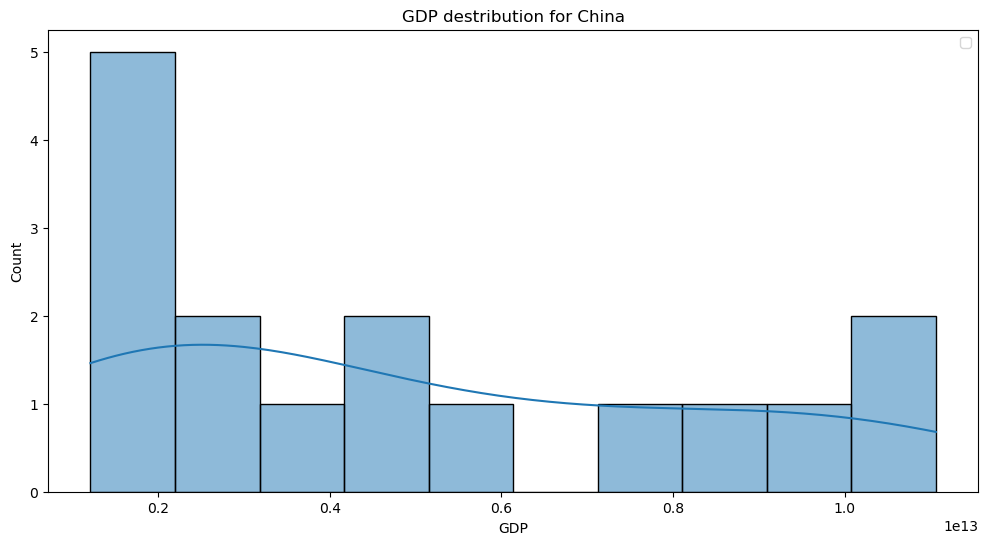

P:\programmmmmmmmm\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


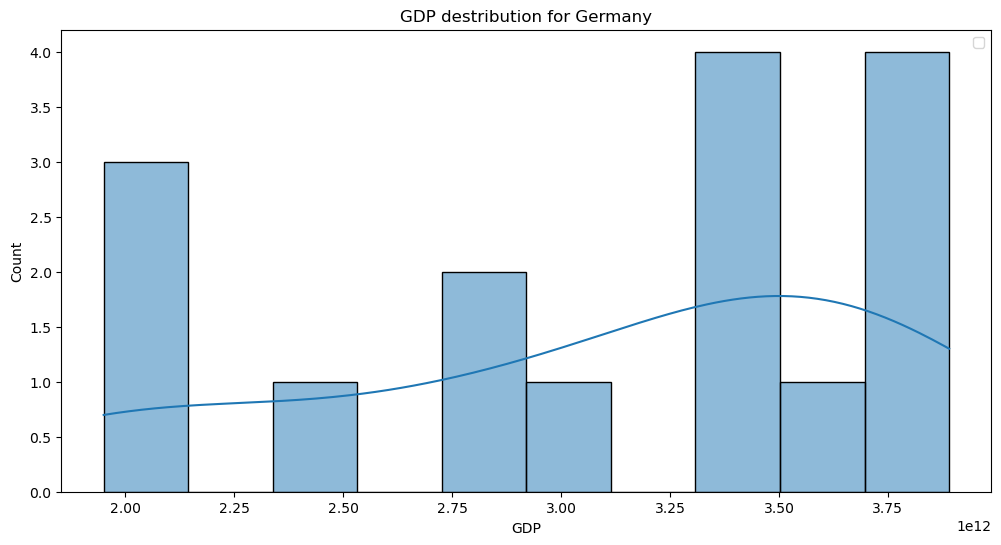

P:\programmmmmmmmm\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


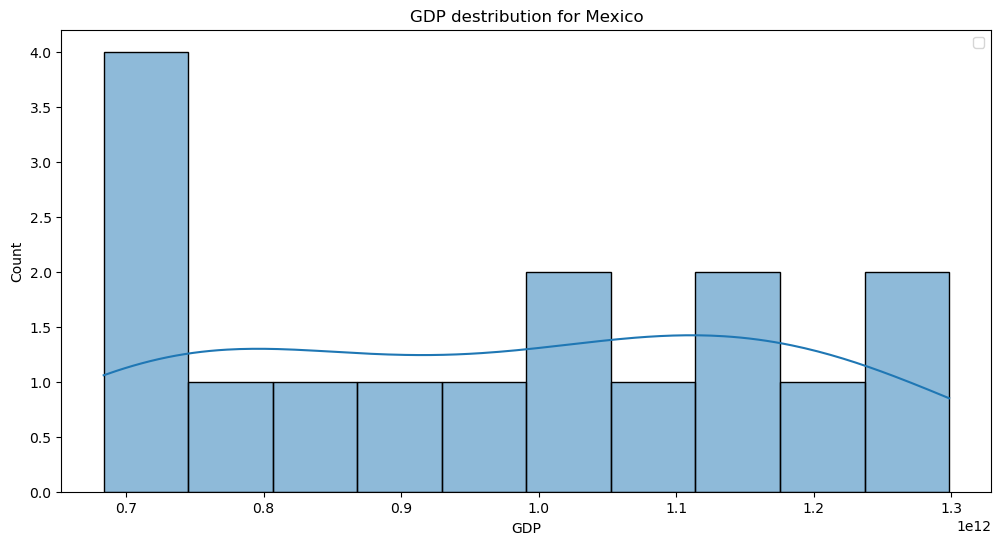

P:\programmmmmmmmm\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


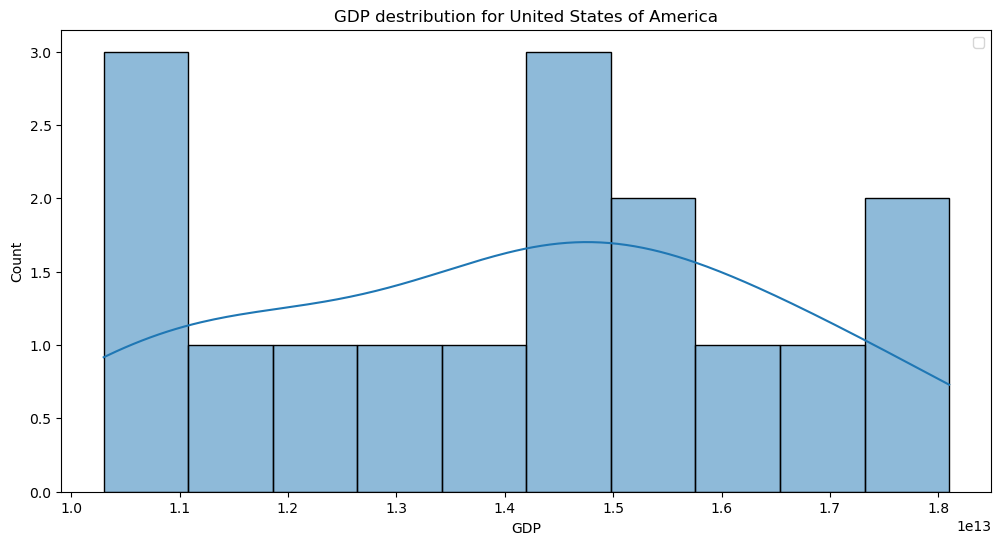

P:\programmmmmmmmm\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


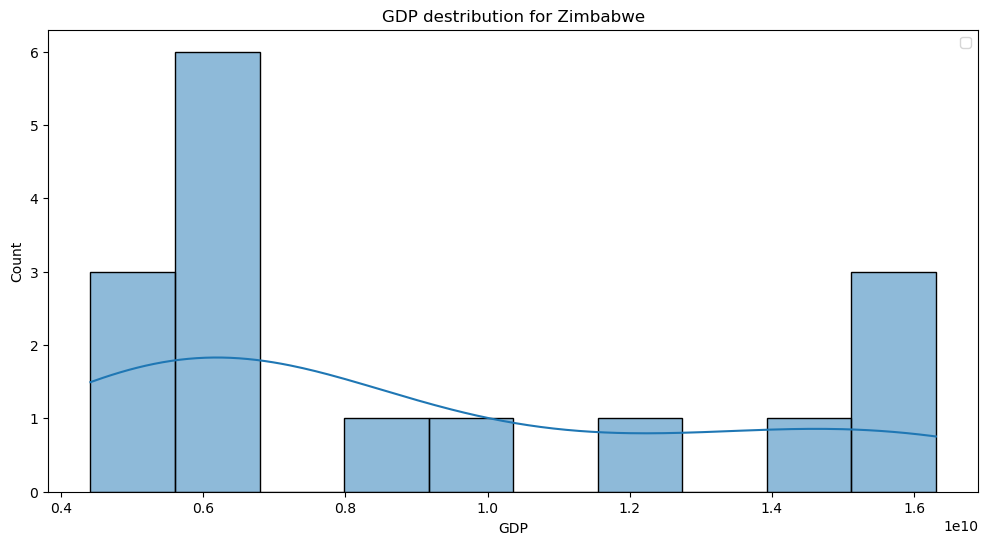

In [25]:
for c in life['Country'].unique():
    
#Create a list individually
    country = life[life['Country'] == c]

    # Create a histogram of GDP for China
    plt.figure(figsize=(12, 6))
    sns.histplot(data=country, x='GDP', bins=10, kde=True)
#     plt.axvline(country['Life expectancy at birth (years)'].min(), color='red', linestyle='--', label='MIN Life Expectancy')
#     plt.axvline(country['Life expectancy at birth (years)'].max(), color='green', linestyle='--', label='MAX Life Expectancy')
    plt.xlabel('GDP')
    plt.title('GDP destribution for ' + str(c))
    plt.legend()
    plt.show()

P:\programmmmmmmmm\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
P:\programmmmmmmmm\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
P:\programmmmmmmmm\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
P:\programmmmmmmmm\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

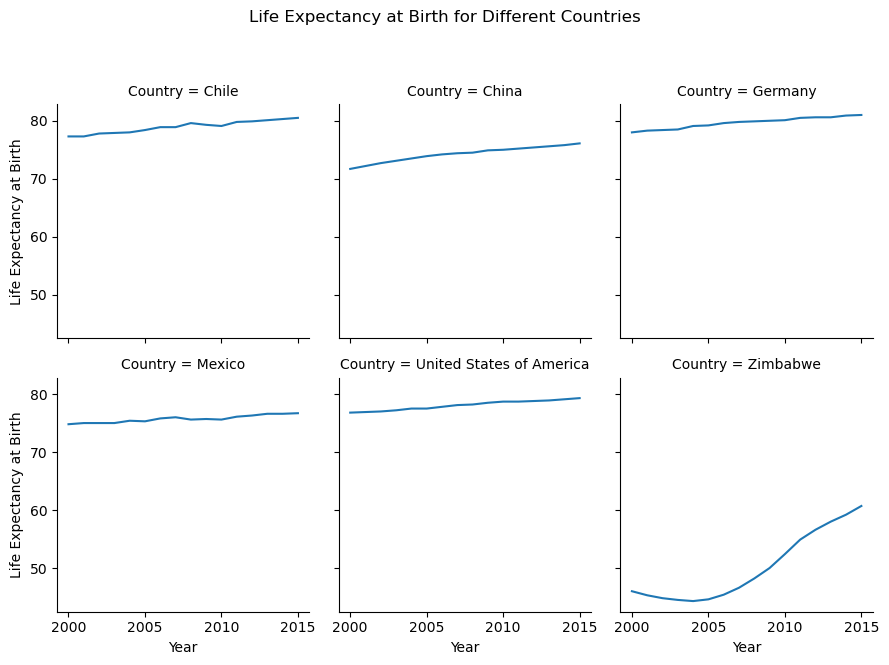

In [19]:
#Life Expectancy at Birth for Different Countries
leab_year = sns.FacetGrid(life, col="Country", col_wrap=3)
leab_year.map(sns.lineplot, "Year", "Life expectancy at birth (years)")

leab_year.set_axis_labels("Year", "Life Expectancy at Birth")
leab_year.fig.suptitle("Life Expectancy at Birth for Different Countries", y=1.1)

plt.show()
plt.close()

P:\programmmmmmmmm\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
P:\programmmmmmmmm\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
P:\programmmmmmmmm\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
P:\programmmmmmmmm\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

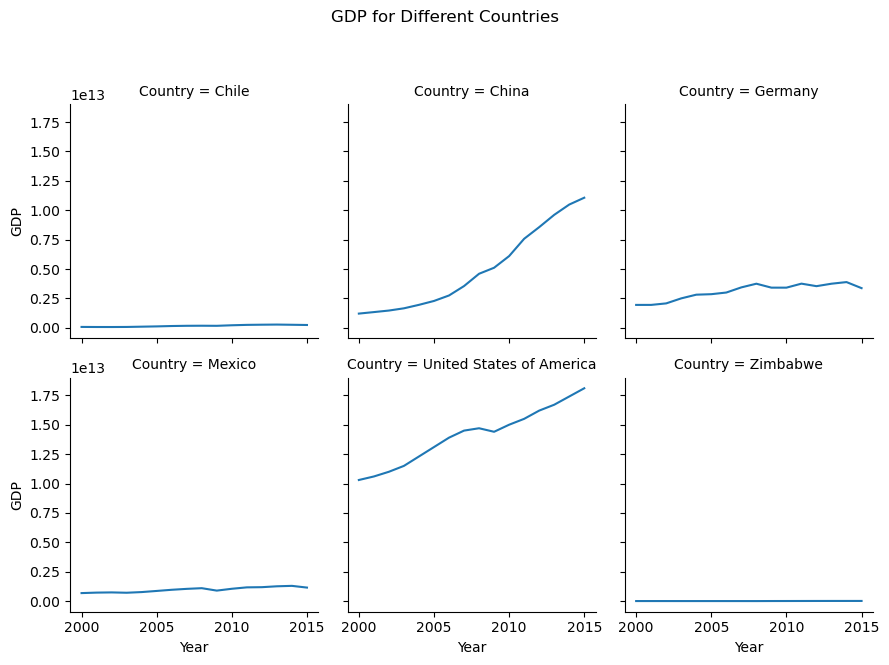

In [20]:
#GDP for Different Countries

GDP_year = sns.FacetGrid(life, col="Country", col_wrap=3)
GDP_year.map(sns.lineplot, "Year", "GDP")

GDP_year.set_axis_labels("Year", "GDP")
GDP_year.fig.suptitle("GDP for Different Countries", y=1.1)

plt.show()
plt.close()

In [27]:
df = pd.read_csv('all_data.csv')
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [28]:
# Renaming columns:
df.rename(columns={'Country': 'country', 'Year': 'year', 'Life expectancy at birth (years)': 'life_expectancy', 'GDP': 'gdp'}, inplace=True)
df.head()

,country,year,life_expectancy,gdp
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [29]:
# Function used to summarize some statistics such as minimum, maximum and mean of GDP and life expectancy:
def stat_summary(data):
    # GDP:
    high_gdp = round(df.gdp.max())
    country_high_gdp = df.loc[df['gdp'] == high_gdp].country.iloc[0]
    low_gdp = round(df.gdp.min())
    country_low_gdp = df.loc[df['gdp'] == low_gdp].country.iloc[0]
    # Life expectancy:
    high_LE = df.life_expectancy.max()
    country_high_LE = df.loc[df['life_expectancy'] == high_LE].country.iloc[0]
    low_LE = df.life_expectancy.min()
    country_low_LE = df.loc[df['life_expectancy'] == low_LE].country.iloc[0]
    
    print("GDP Statistics:")
    print("{} had the highest GDP of ${}.".format(country_high_gdp, high_gdp))
    print("{} had the lowest GDP of ${}.".format(country_low_gdp, low_gdp))
    print("The average GDP of all these countries: ${}.".format(round(df.gdp.mean())))
    print("\nLife expectancy Statistics:")
    print("{} had the highest peak in life expectancy of {}.".format(country_high_LE, high_LE))
    print("{} had the lowest life expectancy of {}.".format(country_low_LE, low_LE))
    print("The average life expectancy of all these countries: {}.".format(round(df.life_expectancy.mean(), 2)))
    
stat_summary(df)

GDP Statistics:
United States of America had the highest GDP of $18100000000000.
Zimbabwe had the lowest GDP of $4415702800.
The average GDP of all these countries: $3880498570768.

Life expectancy Statistics:
Germany had the highest peak in life expectancy of 81.0.
Zimbabwe had the lowest life expectancy of 44.3.
The average life expectancy of all these countries: 72.79.


P:\programmmmmmmmm\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
P:\programmmmmmmmm\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


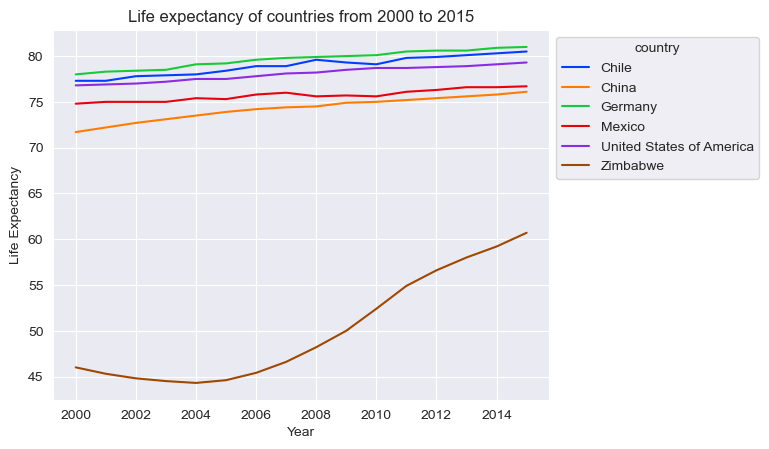

In [30]:
sns.set_style('darkgrid')
ax = sns.lineplot(x='year', y='life_expectancy', data=df, hue='country', palette='bright')
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1, 1))

plt.title('Life expectancy of countries from 2000 to 2015')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')

plt.show()

P:\programmmmmmmmm\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
P:\programmmmmmmmm\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


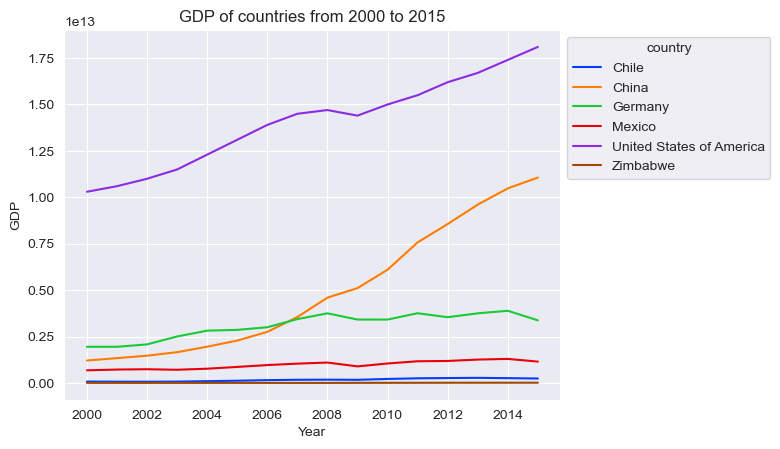

In [31]:
sns.set_style('darkgrid')
ax = sns.lineplot(x='year', y='gdp', data=df, hue='country', palette='bright')
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1, 1))

plt.title('GDP of countries from 2000 to 2015')
plt.xlabel('Year')
plt.ylabel('GDP')

plt.show()

P:\programmmmmmmmm\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
P:\programmmmmmmmm\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
P:\programmmmmmmmm\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
P:\programmmmmmmmm\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

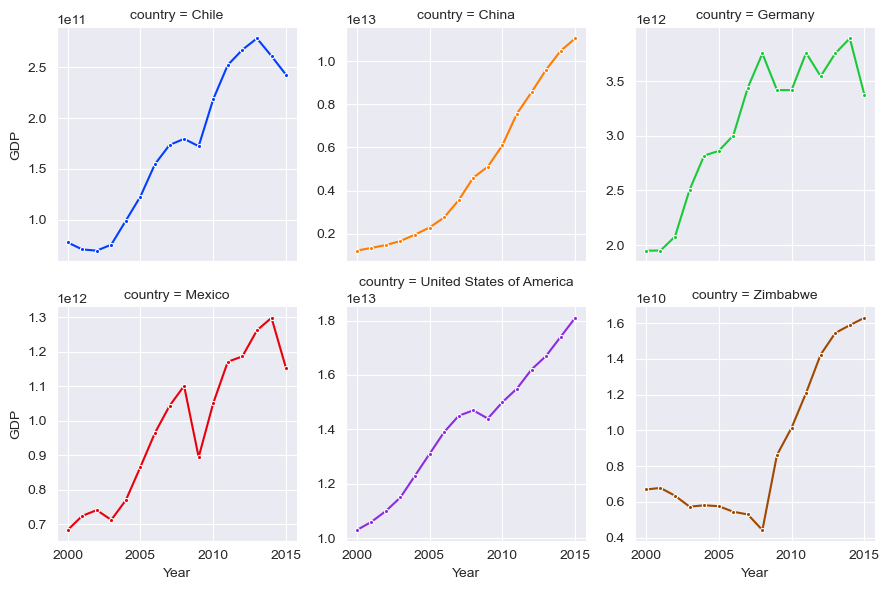

In [32]:
grid = sns.FacetGrid(df, col='country', hue='country', palette='bright', col_wrap=3, sharey=False)
grid.map(sns.lineplot, 'year', 'gdp', marker='.')

grid.set_axis_labels('Year', 'GDP')

plt.show()

P:\programmmmmmmmm\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
P:\programmmmmmmmm\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


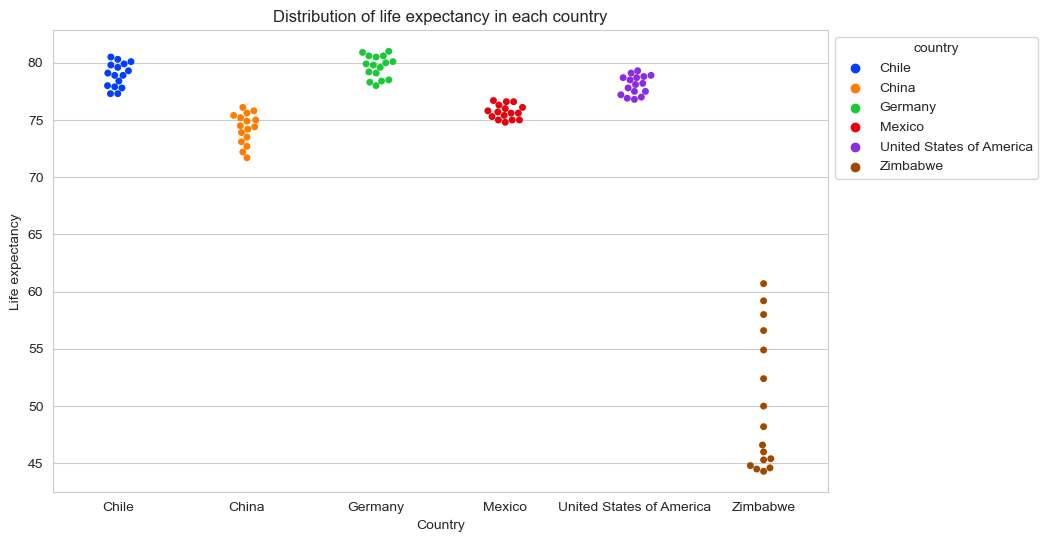

In [33]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
ax = sns.swarmplot(data=df, x='country', y='life_expectancy', hue='country', palette='bright')
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1, 1))

plt.title('Distribution of life expectancy in each country')
plt.xlabel('Country')
plt.ylabel('Life expectancy')

plt.show()

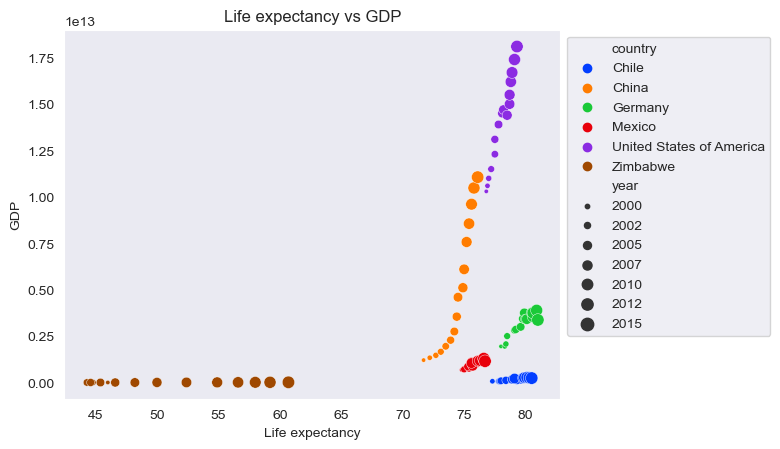

In [34]:
sns.set_style('dark')
ax = sns.scatterplot(data=df, x='life_expectancy', y='gdp', hue='country', palette='bright', size='year', sizes=(10, 80))
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1, 1))


plt.title('Life expectancy vs GDP')
plt.xlabel('Life expectancy')
plt.ylabel('GDP')

plt.show()

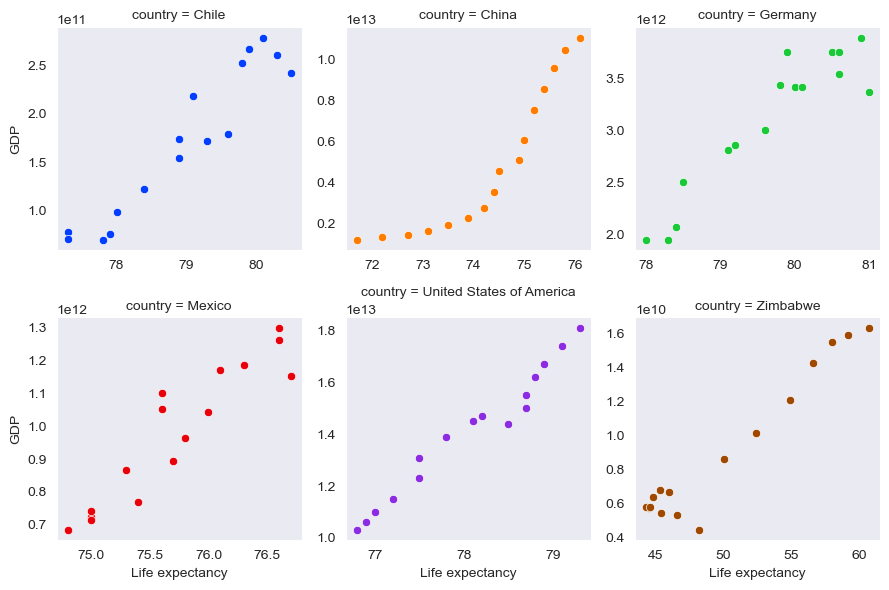

In [35]:
grid = sns.FacetGrid(df, col='country', hue='country', palette='bright', col_wrap=3, sharey=False, sharex=False)
grid.map(sns.scatterplot, 'life_expectancy', 'gdp')

grid.set_axis_labels('Life expectancy', 'GDP')

plt.show()

In [36]:
print("Years included: {}".format(df.year.unique()))

Years included: [2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]
